In [11]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import numpy as np
import datetime
import requests
import warnings

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

In [13]:
# ARIMA models

belgium_data = pd.read_csv("univariate_df_Belgium.csv")
chile_data = pd.read_csv("univariate_df_Chile.csv")
czechia_data = pd.read_csv("univariate_df_Czechia.csv")
estonia_data = pd.read_csv("univariate_df_Estonia.csv")
france_data = pd.read_csv("univariate_df_France.csv")
ireland_data = pd.read_csv("univariate_df_Ireland.csv")
israel_data = pd.read_csv("univariate_df_Israel.csv")
italy_data = pd.read_csv("univariate_df_Italy.csv")
malaysia_data = pd.read_csv("univariate_df_Malaysia.csv")
usa_data = pd.read_csv("univariate_df_United_States.csv")

In [14]:
! pip install pmdarima

## ARIMA

### Belgium ARIMA

In [15]:
##arima belgium
train_size = int(len(belgium_data) * 0.8)
belgium_train, belgium_test = belgium_data[0:train_size], belgium_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(belgium_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
3,1,4,2238.200299
7,2,4,2239.495220
11,3,4,2240.750981
15,4,4,2242.754329
13,4,2,2248.292003
10,3,3,2248.806847
6,2,3,2250.391333
14,4,3,2252.902045
8,3,1,2256.385498
4,2,1,2257.609463


In [20]:
model=ARIMA(belgium_train['new_deaths'],order=(1,1,4))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(1, 1, 4)   Log Likelihood                -903.745
Date:                Thu, 22 Feb 2024   AIC                           1819.491
Time:                        16:18:30   BIC                           1837.942
Sample:                             0   HQIC                          1826.983
                                - 161                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7094      0.043     16.685      0.000       0.626       0.793
ma.L1          0.4066      1.814      0.224      0.823      -3.148       3.961
ma.L2         -0.2815      2.542     -0.111      0.912      -5.263       4.700
ma.L3         -0.6186      2.033     -0.304      0.761      -4.602       3.365
ma.L4         -0.5056      0.915     -0.553      0.581      -2.299       1.288
sigma2      4574.9571   8254.392      0.554      0.579   -1.16e+04    2.08e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              2330.29
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.08   Skew:                             2.82
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

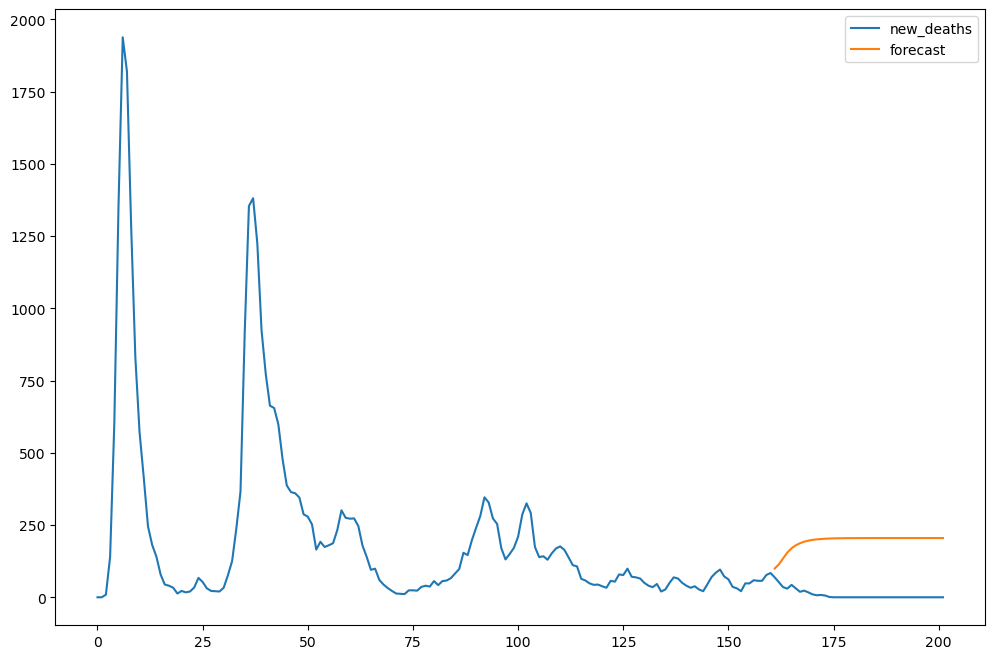

In [36]:
belgium_data['forecast']=model_fit.predict(start = len(belgium_train), end=len(belgium_train)+len(belgium_test)-1, dynamic=True)
belgium_data[['new_deaths','forecast']].plot(figsize=(12,8))

### Chile ARIMA

In [37]:
##arima chile
train_size = int(len(chile_data) * 0.8)
chile_train, chile_test = chile_data[0:train_size], chile_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(chile_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
1,1,2,3291.576764
0,1,1,3292.814050
4,2,1,3293.148674
2,1,3,3293.241853
5,2,2,3293.511085
8,3,1,3293.917585
3,1,4,3295.026748
12,4,1,3295.228459
9,3,2,3295.428063
7,2,4,3297.222102


In [40]:
model=ARIMA(chile_train['new_deaths'],order=(1,1,2))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1324.605
Date:                Thu, 22 Feb 2024   AIC                           2657.211
Time:                        16:35:22   BIC                           2669.512
Sample:                             0   HQIC                          2662.206
                                - 161                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7743      0.345      2.246      0.025       0.099       1.450
ma.L1         -1.6626      0.363     -4.574      0.000      -2.375      -0.950
ma.L2          0.6628      0.365      1.816      0.069      -0.053       1.378
sigma2      8.869e+05   7.94e-07   1.12e+12      0.000    8.87e+05    8.87e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):            109339.15
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):              30.46   Skew:                            10.76
Prob(H) (two-sided):                  0.00   Kurtosis:                       129.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.48e+27. Standard errors may be unstable.
"""

<AxesSubplot:>

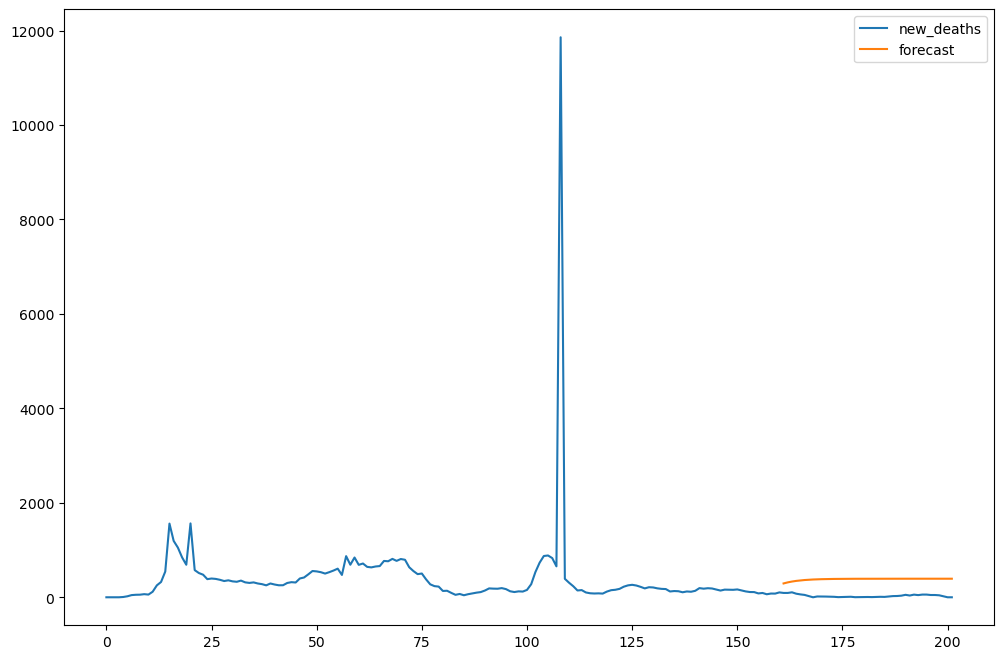

In [41]:
chile_data['forecast']=model_fit.predict(start = len(chile_train), end=len(chile_train)+len(chile_test)-1, dynamic=True)
chile_data[['new_deaths','forecast']].plot(figsize=(12,8))

### Czechia ARIMA

In [42]:
##arima czech
train_size = int(len(czechia_data) * 0.8)
czechia_train, czechia_test = czechia_data[0:train_size], czechia_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(czechia_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
10,3,3,2222.349188
7,2,4,2222.596764
6,2,3,2222.854063
11,3,4,2224.030918
4,2,1,2225.865841
14,4,3,2225.920398
15,4,4,2226.172664
12,4,1,2226.477838
5,2,2,2227.505405
8,3,1,2227.677579


In [43]:
model=ARIMA(chile_train['new_deaths'],order=(3,1,3))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1326.767
Date:                Thu, 22 Feb 2024   AIC                           2667.535
Time:                        16:37:24   BIC                           2689.061
Sample:                             0   HQIC                          2676.276
                                - 161                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1913      4.997      0.038      0.969      -9.603       9.985
ar.L2         -1.0057      0.576     -1.747      0.081      -2.134       0.123
ar.L3          0.1047      0.158      0.660      0.509      -0.206       0.415
ma.L1         -1.0777      5.036     -0.214      0.831     -10.947       8.792
ma.L2          1.0851      5.007      0.217      0.828      -8.728      10.898
ma.L3         -0.9909      0.104     -9.496      0.000      -1.195      -0.786
sigma2      1.044e+06   7.42e-06   1.41e+11      0.000    1.04e+06    1.04e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):            108399.45
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):              25.82   Skew:                            10.75
Prob(H) (two-sided):                  0.00   Kurtosis:                       128.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.26e+28. Standard errors may be unstable.
"""

<AxesSubplot:>

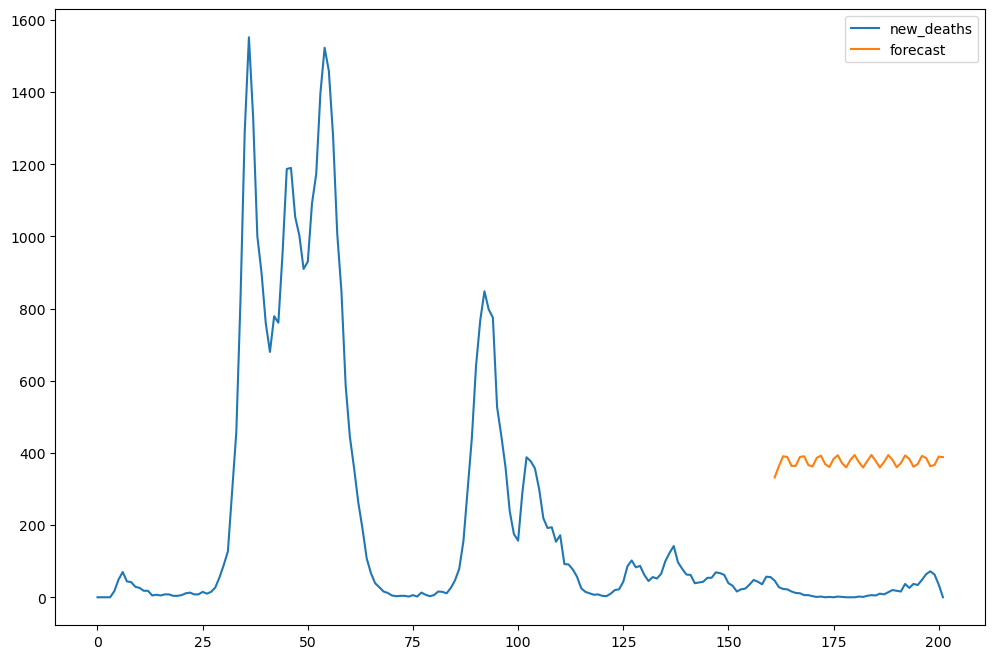

In [44]:
czechia_data['forecast']=model_fit.predict(start = len(czechia_train), end=len(czechia_train)+len(czechia_test)-1, dynamic=True)
czechia_data[['new_deaths','forecast']].plot(figsize=(12,8))

### Estonia ARIMA

In [45]:
##arima czech
train_size = int(len(estonia_data) * 0.8)
estonia_train, estonia_test = estonia_data[0:train_size], estonia_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(estonia_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
7,2,4,1566.802471
1,1,2,1566.866848
0,1,1,1567.447200
11,3,4,1568.705628
5,2,2,1568.817953
4,2,1,1568.912023
2,1,3,1569.108787
8,3,1,1569.201931
12,4,1,1569.333626
3,1,4,1569.553578


In [46]:
model=ARIMA(estonia_train['new_deaths'],order=(2,1,4))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -634.156
Date:                Sat, 24 Feb 2024   AIC                           1282.313
Time:                        11:51:24   BIC                           1303.839
Sample:                             0   HQIC                          1291.054
                                - 161                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5068      0.091    -16.515      0.000      -1.686      -1.328
ar.L2         -0.9080      0.079    -11.554      0.000      -1.062      -0.754
ma.L1          0.8551      0.202      4.229      0.000       0.459       1.251
ma.L2          0.1555      0.124      1.250      0.211      -0.088       0.399
ma.L3         -0.2415      0.140     -1.727      0.084      -0.516       0.033
ma.L4          0.2999      0.084      3.570      0.000       0.135       0.465
sigma2       160.7475     28.682      5.605      0.000     104.532     216.963
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               887.40
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

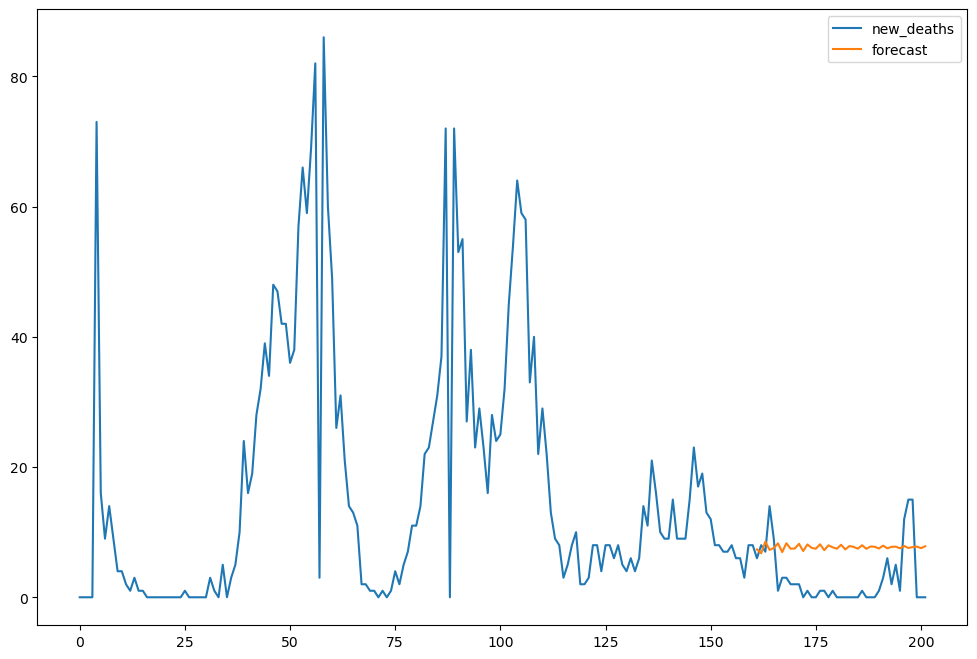

In [51]:
estonia_data['forecast']=model_fit.predict(start = len(estonia_train), end=len(estonia_train)+len(estonia_test)-1, dynamic=True)
estonia_data[['new_deaths','forecast']].plot(figsize=(12,8))